# 생물정보학 및 실습 1 - Term Project용 환경 셋업

```
생물정보학 및 실습 1
서울대학교 협동과정 생물정보학전공 2022년 1학기

이 노트북은 Creative Commons BY-SA 조건으로 재사용 가능합니다.
장혜식 <hyeshik@snu.ac.kr>, 서울대학교 생명과학부
```

이 노트북은 Google Colab을 이용해서 Term Project를 할 수 있도록 환경을 준비해 줍니다. 터미널 사용이 원활하지 않은 상태이고, 데이터를 오랫동안 보관하기 어렵기 때문에 되도록 개인용 컴퓨터에서 [Anaconda](https://www.anaconda.com/)나 [JupyterLab](https://jupyterlab.readthedocs.io/en/stable/) 등을 설치하고 사용하시는 것이 편하지만, 개인용 컴퓨터 사양이 부족한 경우에는 Google CoLab을 사용할 수도 있습니다. 개인용 컴퓨터를 쓸 때는 Windows에서는 [WSL2](https://docs.microsoft.com/en-us/windows/wsl/install-win10)를 쓰시면 리눅스 커맨드라인 환경을 쓸 수 있습니다. Google Colab은 창을 닫은 후 90분 후, 또는 창을 처음 열고 12시간 후에 환경을 닫아버리기 때문에 매번 실습할 때마다 새로 셋업이 필요합니다. `Runtime->Run All`을 실행해서 전체를 한 번 실행하시면 준비됩니다. 모든 것이 잘 안 되고 뭔가 꼬인 느낌이 강하게 들 때는 `Runtime->Factory reset runtime`을 누르고 새로 시작하시면 될 수도 있습니다.


## 시퀀싱 데이터 다운로드
이제 실습 수업에서 필요한 시퀀싱 데이터를 다운로드 받아서 설치합시다. 드라이브 공간만 충분하면 데이터는 계속 저장돼 있기 때문에 학기 전체를 통해서 딱 한 번만 하시면 됩니다. Colab에서는 작업용 데이터를 Google Drive 폴더 아래의 `binfo-datapack1`에 저장합니다. 실습용 데이터는 `/content/drive/MyDrive/binfo1-datapack1`에 풀리게 됩니다.

### (Option 1) Google CoLab에서 접속한 경우
1. [Google Drive 공유폴더](https://drive.google.com/drive/folders/1Y190lbO42VEzjjQkgoxNf_EcZJlHyZa1?usp=sharing)에 접속합니다.
1. 중간 제목줄의 "binfo1-datapack1 ▾"에서 ▾을 누릅니다.
1. Add shortcut to Drive를 누릅니다.
1. My Drive를 선택해서 ADD SHORTCUT 버튼을 누릅니다.
1. 다음 cell을 실행해서 링크가 제대로 들어왔는지 확인합니다. (바로 확인되지 않으면 3–5분 정도 기다렸다가 하면 됩니다.)
1. 제대로 확인되면 다음으로 넘어갑니다.


In [1]:
# !ls -al ../data/binfo1-datapack1/

### (Option 2) CoLab외의 다른 환경에서 접속한 경우
본인 컴퓨터나 연구실 워크스테이션 등에서 작업하는 경우에는 다음 명령어로 다운로드 받으시면 됩니다. 첫 번째에는 wget이 접속오류를 내는 경우가 많으니, 접속에러가 발생하면 다시 한 번 실행해 보세요. `../../data` 부분은 원하는 저장 경로로 바꿔서 지정하시면 됩니다.

In [2]:
# !wget -O - --no-check-certificate https://hyeshik.qbio.io/binfo/binfo1-datapack1.tar | tar -C ../data -xf -

그리고, GENCODE Annotation 데이터도 미리 받아서 저장해 둡니다. 에러가 나면 다시 한 번 실행해 봅니다.

In [3]:
# !wget --no-check-certificate -O ../data/gencode.gtf.gz http://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_mouse/release_M27/gencode.vM27.annotation.gtf.gz

다루기 쉽도록 Annotation 압축을 풉니다.

In [4]:
# !gunzip ../data/gencode.gtf.gz

### 파일 체크섬 확인

받은 데이터의 MD5 체크섬을 확인합니다. 한참 걸립니다. 각 파일들의 원래 체크섬은 다음과 같습니다. 한 번 비교해 보세요.

```
140aaf30bcb9276cc716f8699f04ddd6  CLIP-35L33G.bam
f1b3336ed7e2f97d562dcc71641251bd  CLIP-35L33G.bam.bai
328883a73d507eafbf5b60bd6b906201  RNA-control.bam
02073818e2f398a73c3b76e5169de1ca  RNA-control.bam.bai
b09550d09d6c2a4ce27f0226f426fdb1  RNA-siLin28a.bam
fef112c727244060ea62d3f2564a07f6  RNA-siLin28a.bam.bai
28bbd0c47d725669340c784f1b772c01  RNA-siLuc.bam
43590fdc4d81905c0432e0d1cb8cfd5b  RNA-siLuc.bam.bai
5c08a9297307bc83259e658c4474f0cc  RPF-siLin28a.bam
a1bb3e29be412dfd7fd8d16b1b1acc4c  RPF-siLin28a.bam.bai
f2eebf50943024d0116c9cd3e744c707  RPF-siLuc.bam
dc24f69e8f571fc8be30f28ce5b84fcd  RPF-siLuc.bam.bai
```

In [6]:
!md5sum ../data/binfo1-datapack1/*

140aaf30bcb9276cc716f8699f04ddd6  ../data/binfo1-datapack1/CLIP-35L33G.bam
f1b3336ed7e2f97d562dcc71641251bd  ../data/binfo1-datapack1/CLIP-35L33G.bam.bai
328883a73d507eafbf5b60bd6b906201  ../data/binfo1-datapack1/RNA-control.bam
02073818e2f398a73c3b76e5169de1ca  ../data/binfo1-datapack1/RNA-control.bam.bai
b09550d09d6c2a4ce27f0226f426fdb1  ../data/binfo1-datapack1/RNA-siLin28a.bam
fef112c727244060ea62d3f2564a07f6  ../data/binfo1-datapack1/RNA-siLin28a.bam.bai
28bbd0c47d725669340c784f1b772c01  ../data/binfo1-datapack1/RNA-siLuc.bam
43590fdc4d81905c0432e0d1cb8cfd5b  ../data/binfo1-datapack1/RNA-siLuc.bam.bai
5c08a9297307bc83259e658c4474f0cc  ../data/binfo1-datapack1/RPF-siLin28a.bam
a1bb3e29be412dfd7fd8d16b1b1acc4c  ../data/binfo1-datapack1/RPF-siLin28a.bam.bai
f2eebf50943024d0116c9cd3e744c707  ../data/binfo1-datapack1/RPF-siLuc.bam
dc24f69e8f571fc8be30f28ce5b84fcd  ../data/binfo1-datapack1/RPF-siLuc.bam.bai


In [7]:
!ls -al ../data/binfo1-datapack1/

total 6274100
drwxr-xr-x 2 hyejun18 guests       4096 May  6 00:06 .
drwxr-xr-x 3 hyejun18 guests         61 May  6 00:06 ..
-rw-r--r-- 1 hyejun18 guests 1370036258 May  6  2021 CLIP-35L33G.bam
-rw-r--r-- 1 hyejun18 guests    3118336 May  6  2021 CLIP-35L33G.bam.bai
-rw-r--r-- 1 hyejun18 guests 1003658801 May  6  2021 RNA-control.bam
-rw-r--r-- 1 hyejun18 guests    2276104 May  6  2021 RNA-control.bam.bai
-rw-r--r-- 1 hyejun18 guests 1260991122 May  6  2021 RNA-siLin28a.bam
-rw-r--r-- 1 hyejun18 guests    2710744 May  6  2021 RNA-siLin28a.bam.bai
-rw-r--r-- 1 hyejun18 guests  981684502 May  6  2021 RNA-siLuc.bam
-rw-r--r-- 1 hyejun18 guests    2606104 May  6  2021 RNA-siLuc.bam.bai
-rw-r--r-- 1 hyejun18 guests  737352902 May  6  2021 RPF-siLin28a.bam
-rw-r--r-- 1 hyejun18 guests    2482768 May  6  2021 RPF-siLin28a.bam.bai
-rw-r--r-- 1 hyejun18 guests 1055123479 May  6  2021 RPF-siLuc.bam
-rw-r--r-- 1 hyejun18 guests    2605912 May  6  2021 RPF-siLuc.bam.bai


## Transcript count table 마련하기

제공된 alignment와 annotation 파일들을 이용해서 transcript별 read count를 구해봅니다. 실제 연구에서는 multi-mapping 등을 고려해야 하지만, 여기서는 단순화해서 모두 무시합니다. 데이터가 있는 곳으로 이동해서 작업합시다.

In [11]:
FEATURE_COUNTS = '/casa/hyejun18/anaconda3/envs/binfo1/bin/featureCounts'

In [18]:
%cd ../data/binfo1-datapack1/

/casa/hyejun18/prj/bioinfo1/prj/data/binfo1-datapack1


In [19]:
!$FEATURE_COUNTS -a ../gencode.gtf -o ../../stats/read-counts.txt *.bam 


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v2.0.1

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 6 BAM files                                      ||
||                           o CLIP-35L33G.bam                                ||
||                           o RNA-control.bam                                ||
||                           o RNA-siLin28a.bam                               ||
||                           o RNA-siLuc.bam                     

결과를 pandas로 읽어와 봅니다.

In [20]:
import pandas as pd
cnts = pd.read_csv('../../stats/read-counts.txt', sep='\t', comment='#', index_col=0)
cnts.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
Geneid,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0


이제 한 번 대충 그림을 그려 봅니다.

In [21]:
cnts['clip_enrichment'] = cnts['CLIP-35L33G.bam'] / cnts['RNA-control.bam']
cnts['rden_change'] = (cnts['RPF-siLin28a.bam'] / cnts['RNA-siLin28a.bam']) / (cnts['RPF-siLuc.bam'] / cnts['RNA-siLuc.bam'])
cnts.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change
Geneid,,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0,4.0,NaN
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0,inf,NaN
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,NaN,NaN


/casa/hyejun18/.local/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'Ribosome density change\nupon $Lin28a$ knockdown ( $log_{2}$ )')

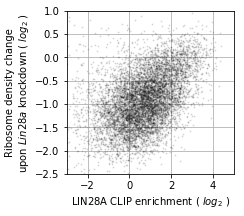

In [25]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

cntsFiltered = cnts[cnts['RNA-control.bam'] >= 100]
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
ax.scatter(np.log2(cntsFiltered['clip_enrichment']),
           np.log2(cntsFiltered['rden_change']), 
           c='k', s=1, alpha=0.1, zorder=10)
ax.set_xlim(-3, 5)
ax.set_ylim(-2.5, 1)
ax.grid(zorder=1)
ax.set_xlabel(r'LIN28A CLIP enrichment ( $log_{2}$ )')
ax.set_ylabel('Ribosome density change\nupon ' + r'$Lin28a$ knockdown ( $log_{2}$ )')

이 그림에는 문제가 많이 있습니다. 논문의 그림처럼 한 번 만들어 봅시다~

## Protein localization 반영하기

논문 그림에서는 protein localization을 반영해서 색으로 나타냈습니다. 이것을 한 번 구현해 봅시다. 각 gene product의 localization을 따로 구하려면 좀 귀찮기 때문에 미리 모아 두었습니다. UniProt에서 매핑된 데이터를 토대로 아주 명확한 것만 일부 정리한 것입니다. 이것도 마찬가지로 처음엔 에러가 나기도 하니까, 다시 실행해보면 거의 잘 됩니다~

In [35]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
mouselocal = pd.read_csv('https://hyeshik.qbio.io/binfo/mouselocalization-20210507.txt', sep='\t')
mouselocal

,gene_id,Gene names,type
0,ENSMUSG00000000001,Gnai3,cytoplasm
1,ENSMUSG00000000028,Cdc45 Cdc45l Cdc45l2,nucleus
2,ENSMUSG00000000049,Apoh B2gp1,cytoplasm
3,ENSMUSG00000000058,Cav2,cytoplasm
4,ENSMUSG00000000085,Scmh1,nucleus
...,...,...,...
9518,ENSMUSG00000117975,Itprip Kiaa1754,integral membrane
9519,ENSMUSG00000118332,Fam220a Acpin1 Sipar,nucleus
9520,ENSMUSG00000118346,Tmem179b,integral membrane
9521,ENSMUSG00000118504,NaN,integral membrane


이제 이 localization 데이터와 위에서 만든 scatter를 결합해서 논문 그림과 비슷하게 만들어 봅시다.

우선 local 정보를 readcounts dataframe에 merge해주고

In [31]:
cntsFiltered.reset_index(inplace=True)
cntsFiltered['Geneid'] = cntsFiltered['Geneid'].apply(lambda x: x.split('.')[0])
cntsFiltered

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Geneid,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change
0,ENSMUSG00000103265,chr1,4805269,4805899,-,631,5,107,3,0,1,0,0.046729,NaN
1,ENSMUSG00000033845,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4843429;4843434;4844659;4846600;4847748;484774...,4844739;4847024;4844739;4847024;4847871;484787...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,8487,4014,1355,3022,2563,1859,3191,2.962362,0.494091
2,ENSMUSG00000025903,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4878011;4878046;4878053;4878119;4878121;487813...,4878205;4878205;4878205;4878205;4878205;487820...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,7145,2045,574,1219,1236,33,44,3.562718,0.760459
3,ENSMUSG00000033813,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4928037;4928261;4937693;4937693;4948250;494825...,4928199;4928726;4937755;4937755;4948355;494835...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,3017,1658,762,2130,2225,328,609,2.175853,0.562609
4,ENSMUSG00000033793,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,5140241;5153303;5153333;5153347;5153355;515335...,5140367;5153501;5153848;5153501;5153501;515350...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,9746,1111,474,1260,1031,603,1128,2.343882,0.437418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8115,ENSMUSG00000064357,chrM,7927,8607,+,681,3,113,60,35,46,36,0.026549,0.745370
8116,ENSMUSG00000064363,chrM,10167,11544,+,1378,373,2150,5028,4224,3292,2498,0.173488,1.107123
8117,ENSMUSG00000064367,chrM,11742,13565,+,1824,3665,5281,15549,17408,5986,5305,0.693997,1.263275
8118,ENSMUSG00000064368,chrM,13552,14070,-,519,1666,1976,6741,8052,11471,10842,0.843117,1.263780


In [36]:
dfMerged = pd.merge(left=mouselocal, right=cntsFiltered, left_on='gene_id', right_on='Geneid', how='inner')
dfMerged

,gene_id,Gene names,type,Geneid,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change
0,ENSMUSG00000000001,Gnai3,cytoplasm,ENSMUSG00000000001,chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3,108014596;108016719;108019251;108019789;108023...,108016632;108016928;108019404;108019918;108023...,-;-;-;-;-;-;-;-;-,3262,1981,717,1491,1817,341,652,2.762901,0.637359
1,ENSMUSG00000000028,Cdc45 Cdc45l Cdc45l2,nucleus,ENSMUSG00000000028,chr16;chr16;chr16;chr16;chr16;chr16;chr16;chr1...,18599197;18599203;18600646;18600646;18603556;1...,18599323;18599323;18600712;18600712;18603632;1...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,3506,509,503,1031,955,222,394,1.011928,0.521917
2,ENSMUSG00000000120,Ngfr Tnfrsf16,integral membrane,ENSMUSG00000000120,chr11;chr11;chr11;chr11;chr11;chr11,95459644;95462646;95465017;95468800;95471779;9...,95461921;95462806;95465269;95469159;95471920;9...,-;-;-;-;-;-,3446,449,174,1259,425,1989,1085,2.580460,0.618826
3,ENSMUSG00000000127,Fer Fert2,nucleus,ENSMUSG00000000127,chr17;chr17;chr17;chr17;chr17;chr17;chr17;chr1...,64170057;64171010;64185061;64203013;64203013;6...,64170219;64171050;64185137;64203278;64203278;6...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,4680,427,157,493,494,109,231,2.719745,0.472819
4,ENSMUSG00000000134,Tfe3 Tcfe3,nucleus,ENSMUSG00000000134,chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;c...,7628799;7628825;7628897;7628903;7628915;762893...,7628869;7628869;7629299;7629299;7629299;762945...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,9261,406,581,964,772,429,767,0.698795,0.447922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,ENSMUSG00000113902,Ndufb1,integral membrane,ENSMUSG00000113902,chr12;chr12;chr12;chr12;chr12;chr12;chr12;chr1...,101934349;101934361;101934369;101935752;101935...,101934469;101934469;101934469;101935896;101935...,-;-;-;-;-;-;-;-;-;-;-,1153,627,107,264,184,1074,1023,5.859813,0.731716
4227,ENSMUSG00000115987,Vps28,cytoplasm,ENSMUSG00000115987,chr15;chr15;chr15;chr15;chr15;chr15;chr15;chr1...,76506287;76506294;76506308;76506309;76506309;7...,76506550;76506550;76506550;76506550;76506550;7...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,2304,150,165,584,336,536,565,0.909091,0.545812
4228,ENSMUSG00000116564,Riok2,nucleus,ENSMUSG00000116564,chr17;chr17;chr17;chr17;chr17;chr17;chr17;chr1...,17594571;17594834;17594852;17597981;17597981;1...,17594932;17594932;17594932;17598119;17598119;1...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,3401,892,519,1079,953,209,630,1.718690,0.293006
4229,ENSMUSG00000117679,Apbb3,nucleus,ENSMUSG00000117679,chr18;chr18;chr18;chr18;chr18;chr18;chr18;chr1...,36804207;36804208;36804376;36804670;36807749;3...,36804728;36804728;36804728;36804728;36808194;3...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,3477,63,125,340,135,20,34,0.504000,0.233564


In [37]:
def match_color(local):
    if local == 'cytoplasm':
        return 'green'
    elif local == 'nucleus':
        return 'blue'
    elif local == 'integral membrane':
        return 'red'
    else:
        raise NameError

In [38]:
dfMerged['color'] = dfMerged['type'].apply(match_color)
dfMerged

,gene_id,Gene names,type,Geneid,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change,color
0,ENSMUSG00000000001,Gnai3,cytoplasm,ENSMUSG00000000001,chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3,108014596;108016719;108019251;108019789;108023...,108016632;108016928;108019404;108019918;108023...,-;-;-;-;-;-;-;-;-,3262,1981,717,1491,1817,341,652,2.762901,0.637359,green
1,ENSMUSG00000000028,Cdc45 Cdc45l Cdc45l2,nucleus,ENSMUSG00000000028,chr16;chr16;chr16;chr16;chr16;chr16;chr16;chr1...,18599197;18599203;18600646;18600646;18603556;1...,18599323;18599323;18600712;18600712;18603632;1...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,3506,509,503,1031,955,222,394,1.011928,0.521917,blue
2,ENSMUSG00000000120,Ngfr Tnfrsf16,integral membrane,ENSMUSG00000000120,chr11;chr11;chr11;chr11;chr11;chr11,95459644;95462646;95465017;95468800;95471779;9...,95461921;95462806;95465269;95469159;95471920;9...,-;-;-;-;-;-,3446,449,174,1259,425,1989,1085,2.580460,0.618826,red
3,ENSMUSG00000000127,Fer Fert2,nucleus,ENSMUSG00000000127,chr17;chr17;chr17;chr17;chr17;chr17;chr17;chr1...,64170057;64171010;64185061;64203013;64203013;6...,64170219;64171050;64185137;64203278;64203278;6...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,4680,427,157,493,494,109,231,2.719745,0.472819,blue
4,ENSMUSG00000000134,Tfe3 Tcfe3,nucleus,ENSMUSG00000000134,chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;chrX;c...,7628799;7628825;7628897;7628903;7628915;762893...,7628869;7628869;7629299;7629299;7629299;762945...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,9261,406,581,964,772,429,767,0.698795,0.447922,blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,ENSMUSG00000113902,Ndufb1,integral membrane,ENSMUSG00000113902,chr12;chr12;chr12;chr12;chr12;chr12;chr12;chr1...,101934349;101934361;101934369;101935752;101935...,101934469;101934469;101934469;101935896;101935...,-;-;-;-;-;-;-;-;-;-;-,1153,627,107,264,184,1074,1023,5.859813,0.731716,red
4227,ENSMUSG00000115987,Vps28,cytoplasm,ENSMUSG00000115987,chr15;chr15;chr15;chr15;chr15;chr15;chr15;chr1...,76506287;76506294;76506308;76506309;76506309;7...,76506550;76506550;76506550;76506550;76506550;7...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,2304,150,165,584,336,536,565,0.909091,0.545812,green
4228,ENSMUSG00000116564,Riok2,nucleus,ENSMUSG00000116564,chr17;chr17;chr17;chr17;chr17;chr17;chr17;chr1...,17594571;17594834;17594852;17597981;17597981;1...,17594932;17594932;17594932;17598119;17598119;1...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,3401,892,519,1079,953,209,630,1.718690,0.293006,blue
4229,ENSMUSG00000117679,Apbb3,nucleus,ENSMUSG00000117679,chr18;chr18;chr18;chr18;chr18;chr18;chr18;chr1...,36804207;36804208;36804376;36804670;36807749;3...,36804728;36804728;36804728;36804728;36808194;3...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,3477,63,125,340,135,20,34,0.504000,0.233564,blue


점들이 찍히는 순서를 random하게 하기 위해, 그리고 너무 많은 점이 찍혀 가독성이 떨어지는 것을 방지하기 위해 적당히 random sampling을 해주고

In [53]:
dfShuffled = dfMerged.sample(frac=0.1)
dfShuffled

,gene_id,Gene names,type,Geneid,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change,color
2354,ENSMUSG00000030850,Ate1,nucleus,ENSMUSG00000030850,chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;chr7;c...,129993223;129993223;129996075;129996257;129996...,129996466;129996466;129996466;129996466;129996...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,5579,964,353,691,656,90,183,2.730878,0.466893,blue
1793,ENSMUSG00000027248,Pdia3 Erp Erp60 Grp58,nucleus,ENSMUSG00000027248,chr2;chr2;chr2;chr2;chr2;chr2;chr2;chr2;chr2;c...,121244256;121244364;121244589;121252930;121252...,121244686;121244686;121244686;121253008;121253...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,3139,12110,1647,5460,4829,18401,18830,7.352763,0.864282,blue
4162,ENSMUSG00000075706,Gpx4,nucleus,ENSMUSG00000075706,chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr1...,79883000;79884580;79889322;79889869;79889871;7...,79883209;79884662;79889549;79890004;79890134;7...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,1724,403,751,467,230,741,437,0.536618,0.835118,blue
2500,ENSMUSG00000031951,Tmem231,integral membrane,ENSMUSG00000031951,chr8;chr8;chr8;chr8;chr8;chr8;chr8;chr8;chr8;c...,112638643;112638705;112641121;112641121;112641...,112640741;112640741;112641226;112641226;112641...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-,5372,332,167,530,201,383,160,1.988024,0.907818,red
3854,ENSMUSG00000058835,Abi1 Ssh3bp1,nucleus,ENSMUSG00000058835,chr2;chr2;chr2;chr2;chr2;chr2;chr2;chr2;chr2;c...,22830085;22830085;22830098;22830320;22830376;2...,22832059;22832059;22832059;22832059;22832059;2...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,4032,644,312,1005,819,324,430,2.064103,0.614037,blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,ENSMUSG00000036833,Pnpla7,integral membrane,ENSMUSG00000036833,chr2;chr2;chr2;chr2;chr2;chr2;chr2;chr2;chr2;c...,24866045;24866085;24866100;24866101;24866113;2...,24866325;24866229;24866325;24866325;24866325;2...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,7496,204,165,280,183,82,90,1.236364,0.595476,red
2167,ENSMUSG00000029304,Spp1 Eta-1 Op Spp-1,cytoplasm,ENSMUSG00000029304,chr5;chr5;chr5;chr5;chr5;chr5;chr5;chr5;chr5;c...,104582984;104582984;104582987;104583005;104583...,104583062;104583062;104583114;104583062;104583...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,1648,5951,1078,3690,2610,19701,12984,5.520408,1.073233,green
3454,ENSMUSG00000044167,Foxo1 Fkhr Foxo1a,nucleus,ENSMUSG00000044167,chr3;chr3;chr3,52175757;52252460;52254417,52176843;52253811;52260642,+;+;+,8665,636,218,510,419,180,350,2.917431,0.422521,blue
1316,ENSMUSG00000024121,Atp6v0c Atp6c Atp6l Atpl Mvp,integral membrane,ENSMUSG00000024121,chr17;chr17;chr17;chr17;chr17;chr17;chr17;chr1...,24382840;24382840;24383127;24383394;24383512;2...,24383582;24383582;24383582;24383582;24383582;2...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-,3384,915,853,1630,1131,1863,1850,1.072685,0.698741,red


Text(0, 0.5, 'Ribosome density change\nupon $Lin28a$ knockdown ( $log_{2}$ )')

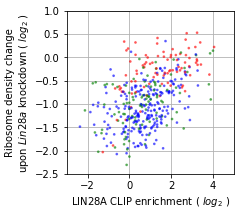

In [59]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

fig, ax = plt.subplots(1, 1, figsize=(3, 3))
ax.scatter(np.log2(dfShuffled['clip_enrichment']),
           np.log2(dfShuffled['rden_change']), 
           c=dfShuffled['color'], s=3, alpha=0.5, zorder=10)
ax.set_xlim(-3, 5)
ax.set_ylim(-2.5, 1)
ax.grid(zorder=1)
ax.set_xlabel(r'LIN28A CLIP enrichment ( $log_{2}$ )')
ax.set_ylabel('Ribosome density change\nupon ' + r'$Lin28a$ knockdown ( $log_{2}$ )')